# Varbench dataset statistics
This notebook contains misceleaneous statistics on the input (manually curated) dataset

In [1]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
splits = {'benchmark': 'tikz/benchmark-00000-of-00001.parquet', 'test': 'tikz/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/CharlyR/varbench/" + splits["benchmark"])

/home/creux/miniconda3/envs/varbench/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.columns

Index(['difficulty_ast', 'id', 'code', 'commented_code', 'instruction',
       'result_description', 'difficulty', 'modification_type', 'type',
       'patch', 'template_solution_code', 'code_solution', 'image_solution',
       'image_input'],
      dtype='object')

In [ ]:
df[["code","id","type"]].groupby(["code","type"]).count().describe()#number of unique input code and avg edits per code

,id
count,45.000000
mean,2.222222
std,1.579541
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,5.000000


In [ ]:
df[["id","modification_type"]].groupby("modification_type").count()#number of types of changes

,id
modification_type,
add,25
remove,13
update,62


In [12]:
df[["id","difficulty"]].groupby("difficulty").count()#number of difficulty levels

,id
difficulty,
easy,41
hard,23
medium,36


,difficulty_ast
count,100.000000
mean,20.420000
std,32.892597
min,1.000000
25%,2.000000
50%,6.000000
75%,20.000000
max,160.000000


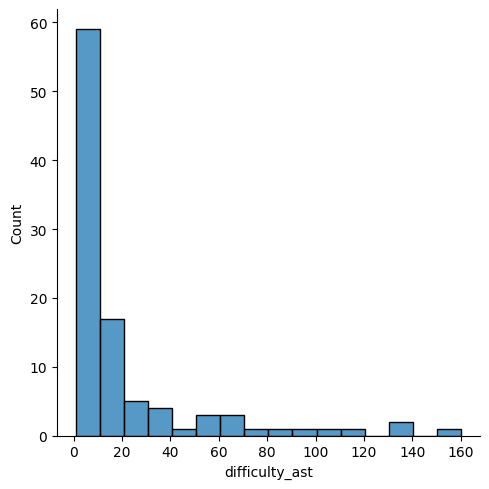

In [43]:
import seaborn as sb
sb.displot(x=df["difficulty_ast"],binwidth=10)
df[["difficulty_ast"]].describe()#number of difficulty levels


,len_code,len_char_code
count,100.00000,100.000000
mean,63.07000,2167.940000
std,15.61549,510.131827
min,25.00000,918.000000
25%,54.00000,1759.000000
50%,61.00000,2157.000000
75%,73.00000,2471.000000
max,104.00000,3323.000000


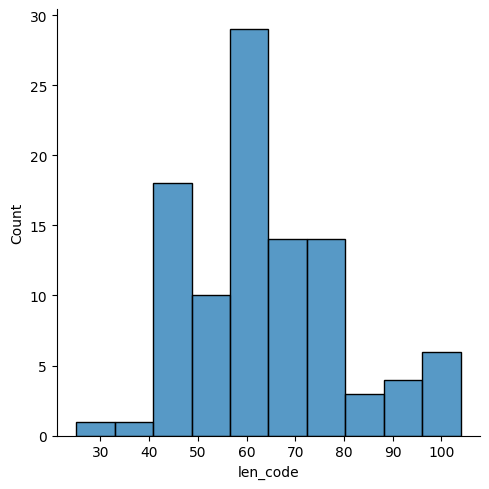

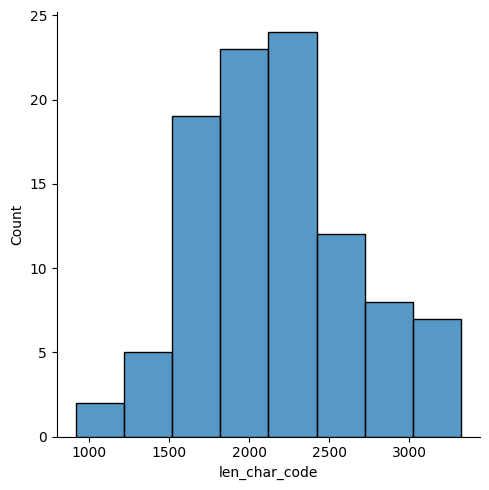

In [15]:
import seaborn as sb
tmpdf = df[["code", "id"]].drop_duplicates()


def cal_len(row):
    row["len_code"] = len(row["code"].splitlines())
    row["len_char_code"] = len(row["code"])
    return row


tmpdf = tmpdf.apply(cal_len, axis=1)
sb.displot(x=tmpdf["len_code"])
sb.displot(x=tmpdf["len_char_code"])
tmpdf.apply(cal_len, axis=1).describe()

In [16]:
tmpdf = df[["code","type","id"]][df["type"]=="scientific"].drop_duplicates()


def cal_nb_shapes(row):
    row["number_fill"] = row["code"].count("\\fill")
    row["number_draw"] = row["code"].count("\\draw")
    return row

tmpdf.apply(cal_nb_shapes, axis=1).describe()

,number_fill,number_draw
count,50.000000,50.000000
mean,1.060000,12.900000
std,2.965172,8.762746
min,0.000000,2.000000
25%,0.000000,7.250000
50%,0.000000,10.500000
75%,0.750000,15.000000
max,19.000000,37.000000


In [ ]:
import datasets
tmpds = datasets.load_dataset("CharlyR/varbench",split="benchmark")
tmpds = tmpds.remove_columns(list(set(tmpds.column_names) - set(["code","type","image_input"])))
tmpds= tmpds.filter(lambda row : row["type"]=="scientific")
tmpds.push_to_hub("CharlyR/varbench-inputs", config_name="manually_selected", split="train")


Uploading the dataset shards: 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/CharlyR/varbench-inputs/commit/42940d4f552343f45e032ff580f3d082b6755acb', commit_message='Upload dataset', commit_description='', oid='42940d4f552343f45e032ff580f3d082b6755acb', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/CharlyR/varbench-inputs', endpoint='https://huggingface.co', repo_type='dataset', repo_id='CharlyR/varbench-inputs'), pr_revision=None, pr_num=None)